
**Tutorial de Keras**  by José Jasso in licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

<font size=3 color='blue'>

#  Tutorial de Keras


In [ ]:
#Ejecutamos esto primero para tratar de minimizar la aleatoriedad de los cálculos   
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


<font size=3 color="black">

## Ventajas y desventajas

\+ Los comandos son intuitivos y simples 

\+ Es muy fácil experimentar con diferentes arquitecturas 

\+ Al ser relativamente popular, esta mejor documentado y hay muchos ejemplos en la red  

\+ Puedes usar CPU o GPU  

\- Al parecer tiene un desempeño reducido en comparación a frameworks especializados, por ejemplo computer vision: Caffe tarda menos en entrenar que Keras  

\- A veces debuggear un codigo basado en tensorflow o keras, resulta laborioso y tedioso, esto es debido por lo minimalista del codigo 

\- Al ser bastante usado es constantemente actualizado, lo que tropieza con las extensas librerias, haciendo que existan bastante incompatibilidades, o bien tener reescribir el código a la nueva sintaxis    


<font size=3 color="black">

### Introducción 

Keras corre sobre librerías de código abierto como TensorFlow, Theano o Cognitive Toolkit(CNTK). Theano es una librería de python usada para tareas rápidas de computación numérica. TensorFlow es librería simbólico-matemática mas famosa usada para crear redes neuronales y modelos de aprendizaje profundo. CNTK es un entorno de trabajo para aprendizaje profundo desarrollado por Microsoft, usa librerías de Python, C#, C++, etc. Theano y TensorFlow son librerías  muy poderosas pero difíciles de entender para crear redes neuronales.



Keras esta basado en mínimas estructuras que proveen una limpia y fácil forma de crear modelos de aprendizaje profundo.


<font size=3 color="red">

### Algunas librerías importantes

<font size=3 color="green">
-numpy: poderosa biblioteca para trabajar con vectores y matrices, así como diversas funciones matemáticas.

<font size=3 color="green">
-opencv: poderosa biblioteca que se enfoca en lo referente a visión artificial.

<font size=3 color="green">
 -matplotlib: biblioteca útil para desplegar gráficas e imágenes, muy usada debido a su compatibilidad con numpy.

<font size=3 color="green">
-pydot/graphviz: son herramientas que ayudan a visualizar el arreglo de las arquitecturas.

<font size=3 color="green">
    -pillow: librería útil para acceder a la información de una imagen, soporta varios formatos.

<font size=2 color="black">

# Flujo de trabajo de una red neuronal 

### Recolección de información

Para trabajar en Deep learning, se requiere una gran cantidad de información. El formato de dicha información cambia según el tipo de Red neuronal que se trabaje, en este caso se trabajara con una red Fully-Connected, por lo tanto la información que se necesita es píxeles, es decir, imágenes.


Como todo, hay distintas formas de conseguir dicha información, webscraping, usar datasets ya existentes, elaborar tu propio dataset, etc..

Por comodidad y para que se tenga un común a trabajar se escogió una base ya existente. Dicha base son dos archivos en formato h5, que contienen 439 imágenes de rocas, no rocas mezcladas y 69 que servirán como imágenes para hacer evaluación del modelo.
Por lo tanto la red que se hará es una de clasificación binaria simple, es decir nos dirá si la imagen es una roca o no lo es, esto con arquitecturas de capas densas.


### Análisis de información

 <font size=3 color='black'>   
Hay que tener un buen entendimiento de que y cuanta información se tiene para trabajar, esto para poder elegir/construir una arquitectura adecuada.

### Escoger un algoritmo (modelo)

Escoger un algoritmo, que mejor ajuste la información para el tipo de aprendizaje que se necesite (clasificación de imágenes, procesamiento de texto,etc.,) y la información que se tiene. Un modelo tiene una o múltiples capas, cada capa en una red neuronal artificial puede ser representado por una capa de **Keras**.


- **Preparar los datos:**  Procesar, filtrar y seleccionar solo la información requerida de los datos.
- **Separar los datos:**  Separar los datos en el conjunto de entrenamiento (training set) y el de prueba/validación (test set). Los datos de prueba son usados para evaluar la predicción del modelo (una vez que la maquina aprenda) y para revisar la eficiencia del proceso de aprendizaje.
- **Establecer arquitectura del modelo:**  Plantear un modelo inicial, capas entrada, escondidas y de salida. Con sus respectivos modificadores como capas de normalización o regularización, etc.,
- **Compilar el modelo:**  Compilar el modelo, para que pueda ser usado para aprender y finalmente para predecir. Este paso requiere de nosotros escoger una función de costo (Loss function) y un optimizador (Optimizer). Son usados en la fase de aprendizaje para encontrar el error (desviación de la información ingresada) y para optimizar de forma que el error sea minimizado.
- **Ajustar el modelo:**  El proceso actual de aprendizaje se hace en esta fase usando el el training set.
- **Evaluar el modelo:**  Evaluar el modelo mediante predicciones al test set y comparando la prediccion con los resultados correctos del test set.
- **Predecir el resultado para un valor desconocido:**  Predecir la salida para un valor desconocido (diferente de los datos existentes training y test set).
- **Mantener, modificar o escoger un nuevo algoritmo:**  Revisar si la evaluación o el modelo es satisfactorio. Si lo es, se guarda el modelo para predicciones futuras. Si no, se modifica o escoge un nuevo modelo y finalmente, entrenar de nuevo, predecir y evaluar el modelo. Se repite este proceso hasta que el mejor modelo se encuentre.

## Arquitectura de Keras

La API Keras se puede dividir en tres categorías principales:

- Modelo


- Layers (Capas)


- Core Modules(Modulos principales)

En Keras, red neuronal es representada por Modelos de Keras, que a su vez, cada Modelo de Keras es una composición de capas (input, convolution, pooling,etc.) y de módulos (función de activación, regularización, etc..).

<img src="https://drive.google.com/uc?id=1z_J01DwcdnASoDNe34rR-6DjUxC2UlM1" width=820 height=420 align = "center" >

# Modelo

Keras tiene dos tipos de modelos :

**[Sequential](https://keras.io/models/sequential/):**  Es básicamente una composición lineal de capas de Keras. El modelo Sequential es fácil de construir, entender así como tiene la habilidad de representar casi todas las redes neuronales disponibles.

Concretamente Sequential se usa cuando cada capa tiene exactamente un tensor de entrara y uno de salida.

<img src="https://drive.google.com/uc?id=1AxF_o7fkEo9M0j0HUY9g_32jqOMx6cni" width=300 height=300 align = "center" >

No es apropiado usar este modelo cuando:
- El la arquitectura tiene múltiples entradas o salidas
- Cualquier capa tiene múltiples entradas o salidas
- Se necesitan compartir capas
- Se quiere tener una topología no lineal (modelo de múltiples ramas, conexiones residuales)

Un modelo sequential simple es:

In [ ]:

from keras.models import Sequential  # Se importa el modelo Sequential de Keras models
from keras.layers import Dense, Activation # Se importa la capa Dense y el modulo Activation

model = Sequential()  # Se crea un nuevo modelo sequential usando Sequential API
model.add(Dense(512, activation = 'relu', input_shape = (784,))) # Agrega una capa Dense con activacion relu (modulo Activation)

**[Functional API](https://keras.io/guides/functional_api/):**  Es una forma para crear modelos mas complejos que el modelo Sequential. Maneja modelos con topología no lineal, capas compartidas, e incluso múltiples entradas y salidas. Manteniendo la intención de los modelos de deep learning, construir modelos con grafos.

<img src="https://drive.google.com/uc?id=1-oF-c1zERsbLf-3tlV8XzN97sx7xaO0S" width=800 height=600 align = "center" >

#  Capas

Cada capa en Keras model representa la capa correspondiente (entrada(input), escondida(hidden), salida(output)) en el modelo que se propone. Keras provee una variedad de capas pre-construidas, de forma que cualquier arquitectura compleja pueda ser fácilmente creada. Algunas de las capas importantes en Keras son: 

- [Core Layers](https://keras.io/api/layers/core_layers/)
- [Convolution Layers](https://keras.io/api/layers/convolution_layers/)
- [Pooling Layers](https://keras.io/api/layers/pooling_layers/)
- [Recurrent Layers](https://keras.io/api/layers/recurrent_layers/)


Una red Sequential simple con diversas capas es:

In [ ]:
from keras.models import Sequential # Se importa el modelo Sequential de Keras models
from keras.layers import Dense, Activation, Dropout # Se importa la capa Dense, el modulo Activation y un modulo de regularización Dropout
 
num_classes= 7 # Se indica el numero de clases 

model = Sequential()  # Se crea un nuevo modelo sequential usando Sequential API

model.add(Dense(512, activation = 'relu', input_shape = (784,))) # Agrega una capa Dense con activación relu (modulo Activation)
model.add(Dropout(0.2)) # Se agrega una capa Dropout para tratar el over-fitting
model.add(Dense(512, activation = 'relu')) # Agrega una capa Dense con activacion relu (modulo Activation), ya no se indica las dimensiones de entrada
model.add(Dropout(0.2)) # Se agrega una capa Dropout para tratar el over-fitting
model.add(Dense(num_classes, activation = 'softmax')) # Se agrega una capa final Dense con activación softmax.

#  Core Modules

Algunos de estos módulos son:

- **[Activations module](https://keras.io/api/layers/activation_layers/):**  Es un concepto importante en una red neuronal y el modulo de activación provee distintas funciones como softmax, relu,etc.,
- **[Loss module](https://keras.io/api/losses/):**  Provee funciones de costo como mean_squared_error, mean_absolute_error, poisson, etc.,
- **[Optimizer module](https://keras.io/api/optimizers/):** Provee funciones de optimización como adam, sgd, etc.,
- **[Regularizers](https://keras.io/api/layers/regularizers/):**  Provee funciones de regularización como dropout, L1 regularizer, etc.,



# Construcción de un modelo



## Preparación de datos/ Dataframe

Dependiendo del formato en que se encuentren los datos a usar, es la forma de prepararlos.

Entonces hay que levantar dichas imágenes a sus respectivos sets training set y test set, para esto usamos pandas, que nos permite convertir todas las imágenes en un dataframe que posteriormente manipulamos para darle el formato necesitado.

In [ ]:
#Importamos los recursos que se usaran
#para levantar el dataframe y diversas operaciones
import pandas as pd 
import h5py
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import cv2

#para la creación del modelo
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import  Flatten,Dense
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import time
import pydot
#Por si se desea experimentar posteriormente con convoluciones, aumento de datos y métodos de regularización
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Abrimos los archivos h5 y los asignamos a las variables
dtest=h5py.File('/content/drive/Shareddrives/Curso IA Febrero 2021/Bloque3/Notebook/test_data.h5','r')
df=h5py.File('/content/drive/Shareddrives/Curso IA Febrero 2021/Bloque3/Notebook/train_data.h5','r')

In [ ]:
#Observamos que "llaves" o grupos maneja el archivo test_data.h5
dtest.keys()


<KeysViewHDF5 ['test_x', 'test_y']>

In [ ]:
#Observamos que "llaves" o grupos maneja el archivo train_data.h5
df.keys()

<KeysViewHDF5 ['train_x', 'train_y']>

In [ ]:
#Extraemos de las variables los grupos
train_x = df.get('train_x')
train_y = df.get('train_y')
test_x = dtest.get('test_x')
test_y = dtest.get('test_y')


In [ ]:
#Se observa que todavía esta con formato relacionado a h5, por lo que hay que convertirlo a un arreglo, con numpy
train_x

<HDF5 dataset "train_x": shape (439, 64, 64, 3), type "<f8">

In [ ]:
#Observamos las dimensiones
train_x.shape


(439, 64, 64, 3)

In [ ]:
#observamos la dimensión
train_y.shape

(439,)

In [ ]:
#Convertimos a arreglos
train_x = np.array(train_x)
test_x = np.array(test_x)
train_y = np.array(train_y)
test_y = np.array(test_y)

In [ ]:
#Es arreglo numpy, ya se puede trabajar 
type(train_x)

numpy.ndarray

In [ ]:
#Es arreglo numpy, ya se puede trabajar
type(test_y)

numpy.ndarray

Vemos una muestra del dataset:

the sample is: 1


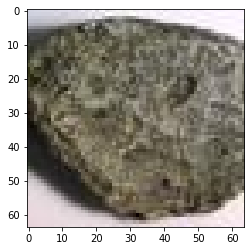

In [ ]:
muestra=3
plt.imshow(train_x[muestra])
print( 'the sample is:',train_y[muestra] )

the sample is: 0


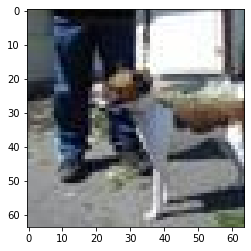

In [ ]:
muestra=1
plt.imshow(train_x[muestra])
print( 'the sample is:',train_y[muestra] )

In [ ]:
#De las imágenes se observa que etiqueta corresponde a que clase
#Creamos el diccionario que servirá para predecir al final
dic={
    0:"No Roca",
    1:"Roca"
}

In [ ]:
#observamos la forma 
train_y.shape

(439,)

In [ ]:
#Se tiene que modificar las dimensiones de este arreglo para que pueda ser cambiado a non_hot
train_y=train_y.reshape((train_y.shape[0],1))
test_y=test_y.reshape((test_y.shape[0],1))

In [ ]:
#vemos la forma
train_y.shape

(439, 1)

In [ ]:
test_y.shape

(69, 1)

En la celda siguiente se utiliza el **[one_hot encoding](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)**, que es aplicado a nuestra codificación actual de las etiquetas, es decir, tenemos una codificación de enteros, pues nuestras etiquetas son números enteros (en este caso 0 y 1), pero en Keras es recomendable y en ciertos casos necesario usar one_hot encoding, es recomendable dado que en ciertos algoritmos ayuda a que las redes neuronales den una mejor predicción y necesario porque dependiendo de que función de perdida se use se necesita este tipo de encoding.

Mas sobre el tema : **[Why One Hot Encoder?](https://vigneshgig.medium.com/why-one-hot-encoder-is-important-in-classification-model-782c76604034)**


In [ ]:
#utilizando esta función de keras es muy sencillo hacer el cambio suponiendo que 
#se tienen los labels como en la forma previa
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)

the sample is: [0. 1.]


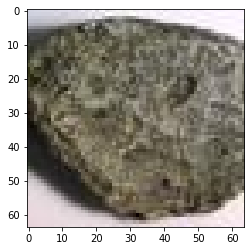

In [ ]:
muestra=3
plt.imshow(train_x[muestra])
print( 'the sample is:',train_y[muestra] )


the sample is: [1. 0.]


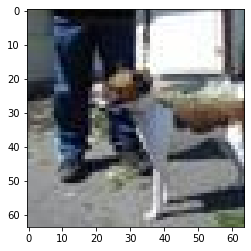

In [ ]:
muestra=1
plt.imshow(train_x[muestra])
print( 'the sample is:',train_y[muestra] )

In [ ]:
#el cambio en el shape nos indica que efectivamente se hizo el cambio a one hot
test_y.shape

(69, 2)

In [ ]:
#revisamos la one hot label para una muestra
test_y[0]

array([1., 0.], dtype=float32)

In [ ]:
#observamos de nuevo como quedaron las muestras
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("X_train shape: " + str(train_x.shape))
print ("Y_train shape: " + str(train_y.shape))
print ("X_test shape: " + str(test_x.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 439
number of test examples = 69
X_train shape: (439, 64, 64, 3)
Y_train shape: (439, 2)
X_test shape: (69, 64, 64, 3)
Y_test shape: (69, 2)


## Establecer arquitectura del modelo

Usaremos el modelo sequential de Keras



[Keras: Flatten](https://keras.io/api/layers/reshaping_layers/flatten/)
  
[Keras: Dense](https://keras.io/api/layers/core_layers/dense/)    



[Keras: Convolutional layers](https://keras.io/layers/convolutional/)

[Keras: Normalization layers](https://keras.io/layers/normalization/)

[Keras: Pooling layers](https://keras.io/layers/pooling/)


In [ ]:
#Se propone este modelo
model = Sequential()
model.add(Flatten(input_shape=(64,64,3)))
model.add(Dense(16,  activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

#### Visualización de la arquitectura



<font size=2 color='black'> 
La funcion plot_model nos da una interpretación de la secuencia lógica de la red
    
summary nos da un resumen de la arquitectura, indicando los parámetros, pesos y biases 
$$ $$
    
[Keras: model visualization](https://keras.io/visualization/#training-history-visualization)
    
[Keras: summary](https://keras.io/api/models/model/#summary-method)

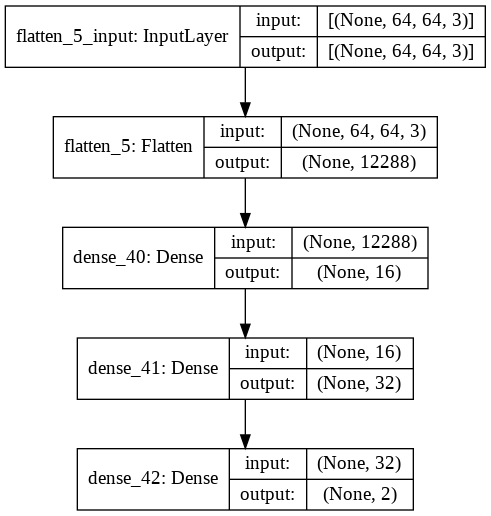

In [ ]:
plot_model(model, to_file='Model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 16)                196624    
_________________________________________________________________
dense_41 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 66        
Total params: 197,234
Trainable params: 197,234
Non-trainable params: 0
_________________________________________________________________


## Compilar el modelo

Una vez establecido un modelo, este necesita ser compilado, es decir, al correr la función compile() esto creara un objeto de Python con el que se creara la red neuronal.  Esto es hecho construyendo el grafo computacional en el formato correcto en el que esta basado Keras (Theano o Tensorflow).

[Keras: Metodos de compilacion](https://keras.io/api/models/model_training_apis/)  

En esta parte se necesita especificar principalmente un optimizador, una función de pérdida (loss) y una métrica.

El [Optimizador Adam](https://keras.io/api/optimizers/adam/) adapta que tan rápido aprenden los diferentes parámetros usando estimados del primer y segundo momento de los gradientes. Es bastante popular y frecuentemente usado como el optimizador por defecto, dado que obtiene buenos resultados rápidamente.

[Profundizar: Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

[Articulo: Adam](https://arxiv.org/abs/1412.6980)    

La función loss [Binary_crossentropy](https://keras.io/api/losses/probabilistic_losses/#binary_crossentropy-function), es la mas usada en problemas de clasificación binaria.
[Profundizar: Funciones Loss](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

La métrica es otra función, parecida a loss, sin embargo los resultados arrojados por esta métrica no son usados al momento de entrenar, se puede usar cualquier función loss en métrica, en este caso y usualmente se usa accuracy.

Accuracy= Numero de predicciones correctas/Total de predicciones hechas

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Ya se tiene el objeto de Python que tiene el modelo y todos sus parámetros con valores iniciales.


## Entrenamiento (Ajustar el modelo)
    

Ahora hay que entrenar el modelo para que los parámetros se ajusten y den las salidas correctas para una entrada dada. La función fit()se encarga de este, es decir, hace el proceso de alimentar a la capa de entrada y obtener una salida, después calcula la función de costo con la que se hace el backpropagation. Este proceso lo hace por cierto numero de épocas.

In [ ]:

start_time = time.time()
history=model.fit(train_x, train_y, validation_split=0.15, epochs=50,batch_size=64)  
end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/50
6/6 [==============================] - 1s 34ms/step - loss: 1.2432 - accuracy: 0.4405 - val_loss: 0.8732 - val_accuracy: 0.4848
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8934 - accuracy: 0.5166 - val_loss: 0.6769 - val_accuracy: 0.5455
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6723 - accuracy: 0.5532 - val_loss: 0.6789 - val_accuracy: 0.5606
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6693 - accuracy: 0.5829 - val_loss: 0.6683 - val_accuracy: 0.5758
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6421 - accuracy: 0.6227 - val_loss: 0.6839 - val_accuracy: 0.6061
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6448 - accuracy: 0.6604 - val_loss: 0.6585 - val_accuracy: 0.6061
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6128 - accuracy: 0.6850 - val_loss: 0.6626 - val_accuracy: 0.6061
Epoch 8/50
6/6 [===========

## Evaluar el modelo

Una vez entrenado el modelo se procede a evaluarlo, los principales mecanismos son revisando los resultados de la función evaluate(), analizando las gráficas de loss y acccuracy y viendo como es el desempeño al momento de predecir con la función predict().


La función evaluate() nos regresa el valor de costo y las métricas del conjunto dado (input,label).

In [ ]:
#en este caso dado que no se genero un validation set aparte, pues el set de validación fue especificado como el 15% del total del conjunto train_x en la función fit()
#se evalúa sobre el test set 
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5968477725982666
Test accuracy: 0.739130437374115


No obstante del resultado que salga, en el caso ideal se espera un valor para el loss de 0 y para accuracy de 1(100%). Ahora procedemos a ver las gráficas de loss y accuracy para ver como se desarrollan.

#### Gráfica de la función de costo para el train set y test set como función de la época

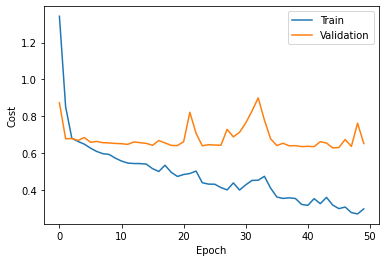

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Gráfica de la accuracy (exactitud) para el train set y test set como función de la época

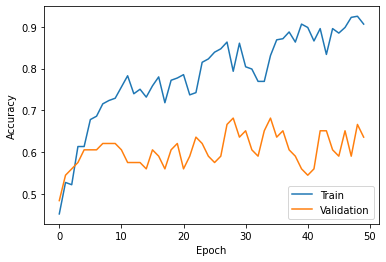

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Se observa el modelo propuesto puede mejorar bastante pues a partir de la época 5 comienza a estar estancado, creando overfitting.

Dependiendo de que región de la gráfica se analice se puede decir que la gráfica siempre tendrá underfitting y overfitting, por lo que en practica se intenta mejorar el modelo, para que en el mejor de los casos la gráfica de validación y train estén casi encimadas, sin embargo usualmente se tiene que llegar a un compromiso, con el que se pueda decir el modelo es suficientemente bueno.

## Predecir el resultado para un valor desconocido

Sabemos de evaluate() que acierta el modelo un 73% de nuestro conjunto sin embargo siempre es bueno observar en que imágenes se equivoco o acertó.
Esto es usando la función predict(), que nos regresa el vector que predice que clase es.

In [ ]:
y=model.predict(test_x)


In [ ]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

Como se observa la función deja la salida en la forma one_hot. Por lo que hacemos la siguiente función para quitarle el one_hot. De momento sera útil para ver como es el algoritmo que hace one_hot, pero en celdas posteriores se pondrá la forma breve.

In [ ]:
def non_hot(yPred):
    labels=[]
    for i in range(len(yPred)):
        max=np.max(yPred[i])
        for j in range(2):
            if (yPred[i][j]==max):
                yPred[i][j]=1
                labels.append(j)
            else:
                yPred[i][j]=0
                
    return labels            
        

In [ ]:
a=non_hot(y)

In [ ]:
a

[0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0]

the sample 2 predicts to a No Roca


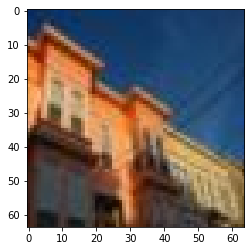

In [ ]:
#Con el primer modelo 

sample = 2

plt.imshow(test_x[sample]);

print( 'the sample', sample, 'predicts:', dic[int(np.squeeze(a[sample]))])

In [ ]:
int(np.squeeze(a[sample]))

0

In [ ]:
labels= non_hot(test_y)

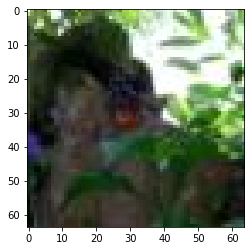

the sample 0 predicts: No Roca
Correcto


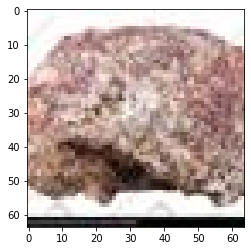

the sample 1 predicts: Roca
Correcto


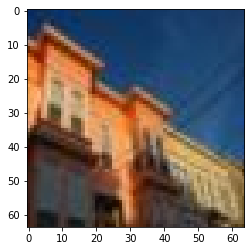

the sample 2 predicts: No Roca
Correcto


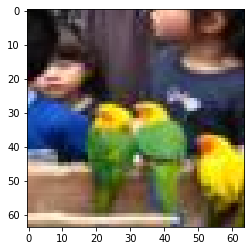

the sample 3 predicts: No Roca
Correcto


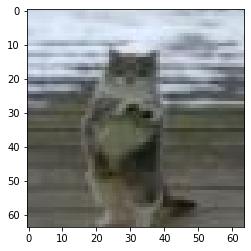

the sample 4 predicts: Roca
Incorrecto


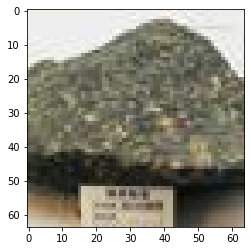

the sample 5 predicts: Roca
Correcto


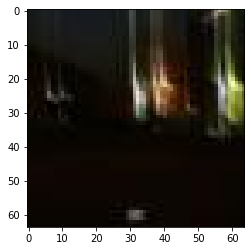

the sample 6 predicts: No Roca
Correcto


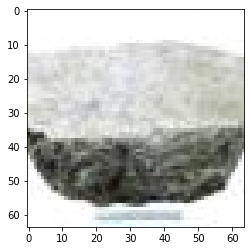

the sample 7 predicts: Roca
Correcto


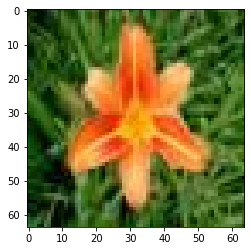

the sample 8 predicts: No Roca
Correcto


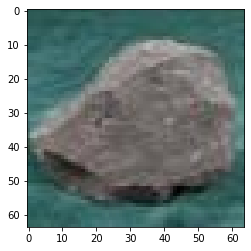

the sample 9 predicts: No Roca
Incorrecto


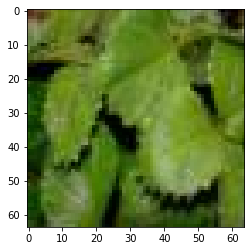

the sample 10 predicts: No Roca
Correcto


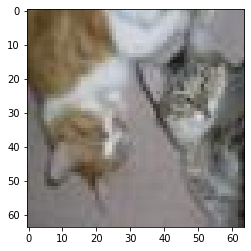

the sample 11 predicts: No Roca
Correcto


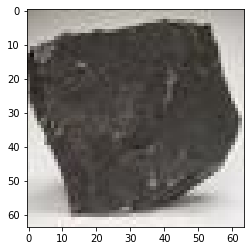

the sample 12 predicts: Roca
Correcto


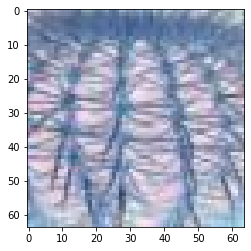

the sample 13 predicts: Roca
Incorrecto


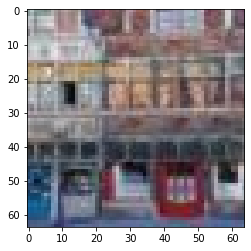

the sample 14 predicts: Roca
Incorrecto


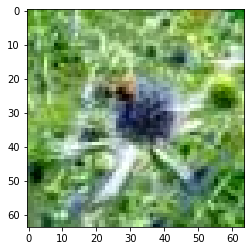

the sample 15 predicts: No Roca
Correcto


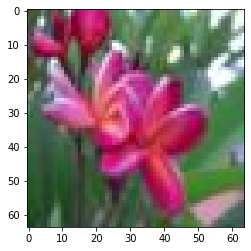

the sample 16 predicts: No Roca
Correcto


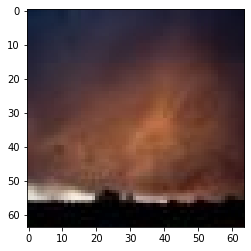

the sample 17 predicts: No Roca
Correcto


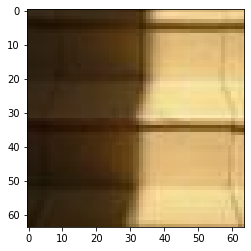

the sample 18 predicts: No Roca
Correcto


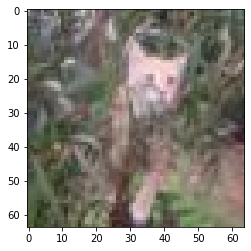

the sample 19 predicts: Roca
Incorrecto


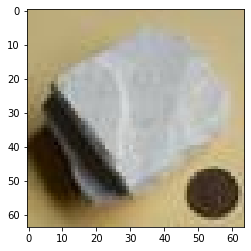

the sample 20 predicts: No Roca
Incorrecto


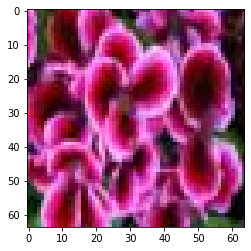

the sample 21 predicts: Roca
Incorrecto


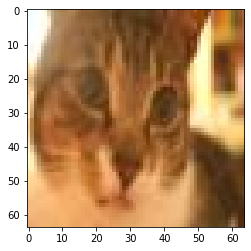

the sample 22 predicts: No Roca
Correcto


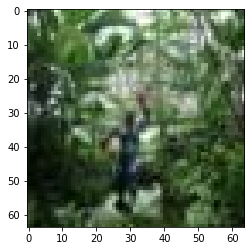

the sample 23 predicts: No Roca
Correcto


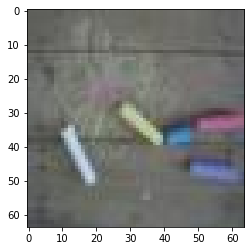

the sample 24 predicts: No Roca
Correcto


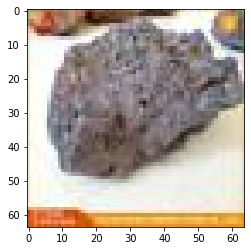

the sample 25 predicts: No Roca
Incorrecto


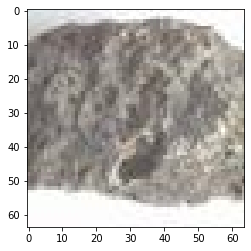

the sample 26 predicts: Roca
Correcto


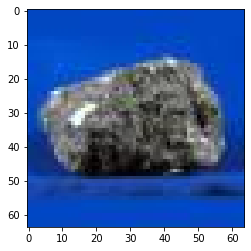

the sample 27 predicts: Roca
Correcto


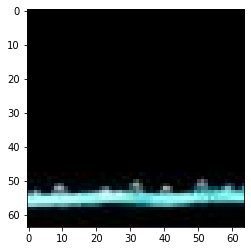

the sample 28 predicts: No Roca
Correcto


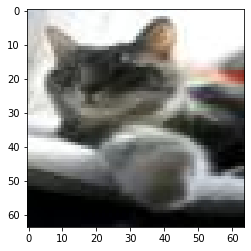

the sample 29 predicts: Roca
Incorrecto


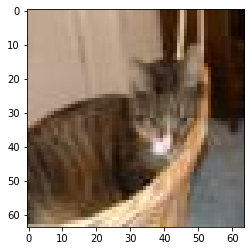

the sample 30 predicts: No Roca
Correcto


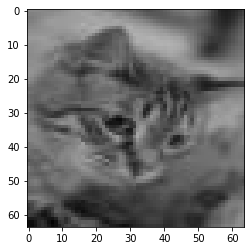

the sample 31 predicts: Roca
Incorrecto


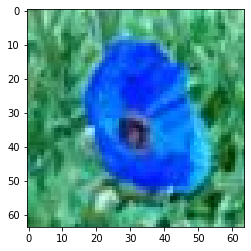

the sample 32 predicts: No Roca
Correcto


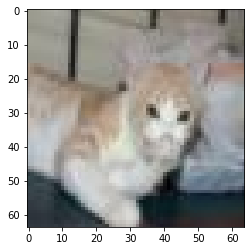

the sample 33 predicts: No Roca
Correcto


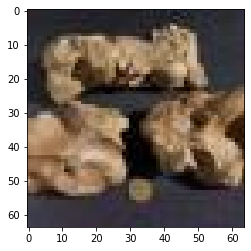

the sample 34 predicts: Roca
Correcto


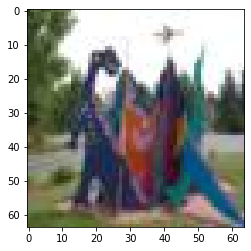

the sample 35 predicts: No Roca
Correcto


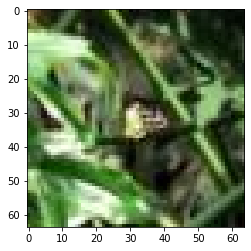

the sample 36 predicts: No Roca
Correcto


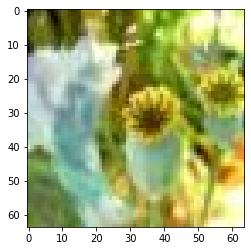

the sample 37 predicts: No Roca
Correcto


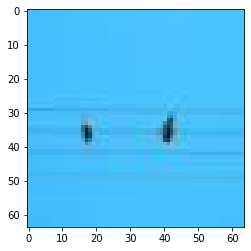

the sample 38 predicts: Roca
Incorrecto


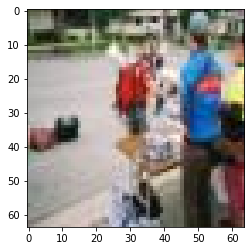

the sample 39 predicts: No Roca
Correcto


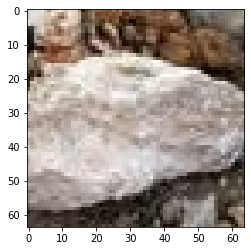

the sample 40 predicts: Roca
Correcto


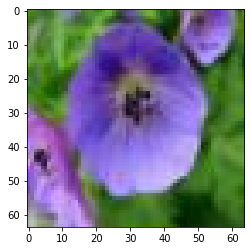

the sample 41 predicts: No Roca
Correcto


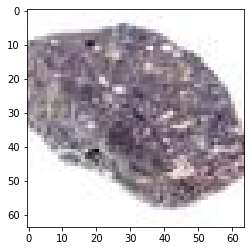

the sample 42 predicts: Roca
Correcto


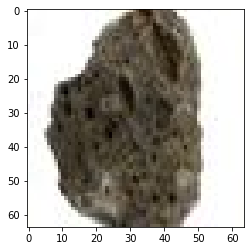

the sample 43 predicts: No Roca
Incorrecto


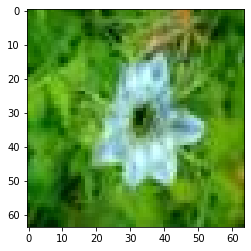

the sample 44 predicts: No Roca
Correcto


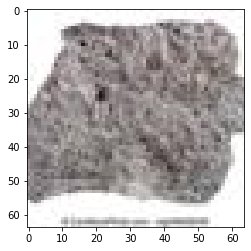

the sample 45 predicts: Roca
Correcto


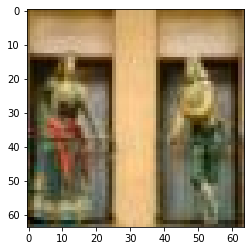

the sample 46 predicts: No Roca
Correcto


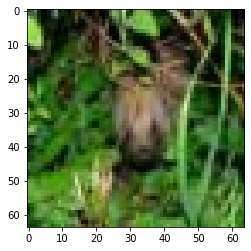

the sample 47 predicts: No Roca
Correcto


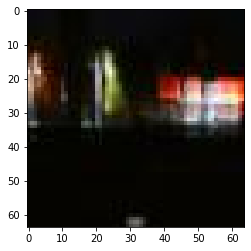

the sample 48 predicts: No Roca
Correcto


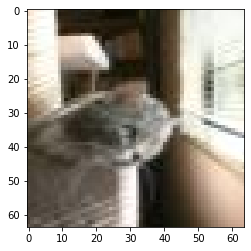

the sample 49 predicts: No Roca
Correcto


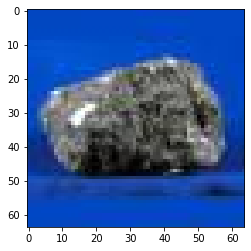

the sample 50 predicts: Roca
Correcto


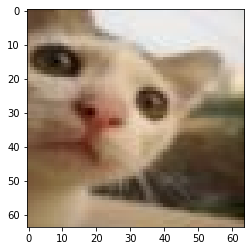

the sample 51 predicts: No Roca
Correcto


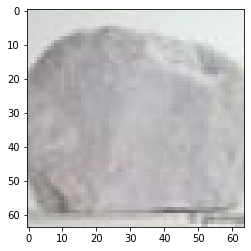

the sample 52 predicts: Roca
Correcto


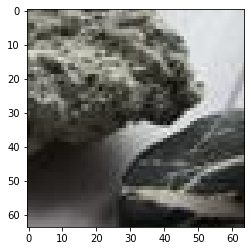

the sample 53 predicts: No Roca
Incorrecto


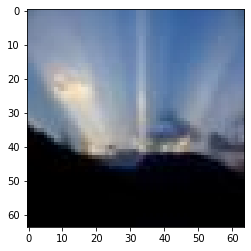

the sample 54 predicts: Roca
Incorrecto


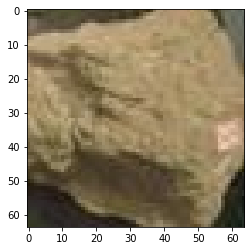

the sample 55 predicts: No Roca
Incorrecto


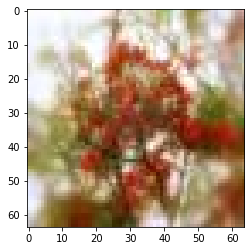

the sample 56 predicts: No Roca
Correcto


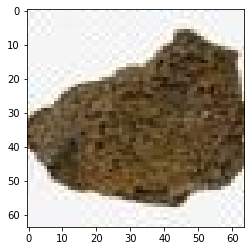

the sample 57 predicts: Roca
Correcto


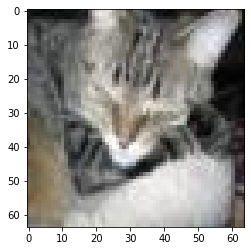

the sample 58 predicts: No Roca
Correcto


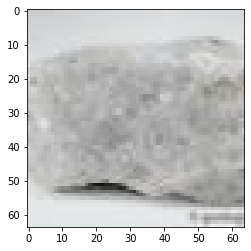

the sample 59 predicts: Roca
Correcto


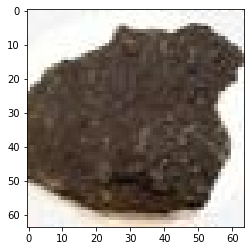

the sample 60 predicts: Roca
Correcto


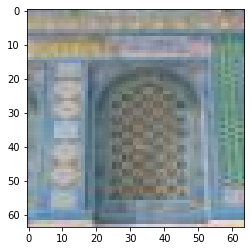

the sample 61 predicts: Roca
Incorrecto


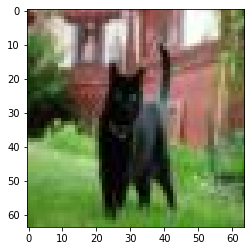

the sample 62 predicts: No Roca
Correcto


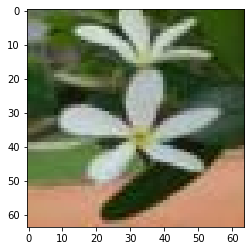

the sample 63 predicts: Roca
Incorrecto


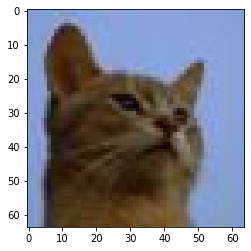

the sample 64 predicts: Roca
Incorrecto


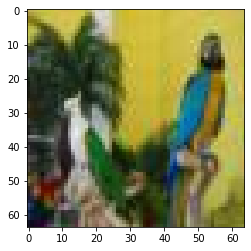

the sample 65 predicts: No Roca
Correcto


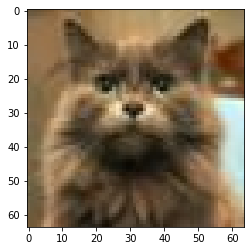

the sample 66 predicts: No Roca
Correcto


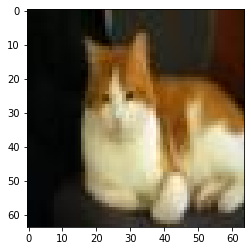

the sample 67 predicts: No Roca
Correcto


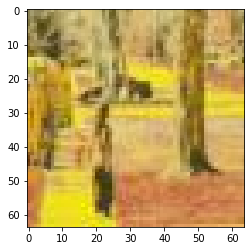

the sample 68 predicts: No Roca
Correcto


In [ ]:
for sample in range(0, len(a)):
  plt.imshow(test_x[sample])
  plt.show()
  print( 'the sample', sample, 'predicts:', dic[int(np.squeeze(a[sample]))])

  if int(np.squeeze(a[sample])) == labels[sample]:
    print("Correcto")
  else:
    print("Incorrecto")

In [ ]:
#Una vez visto esto la otra forma para obtener las clases en su forma de enteros es:
np.argmax(model.predict(test_x), axis=-1) 

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0])

Tenemos algunas predicciones correctas pero en general puede mejorar, esto se logra haciendo una arquitectura mas compleja o bien entrenando con un conjunto mas robusto con el que pueda generalizar bien.

## Mantener, modificar o escoger un nuevo modelo

Una vez que se tienen las evaluaciones del modelo hecho, se decide si mejorar la arquitectura, modificar algún parámetro, etc,..
O bien si se tienen resultados "aceptables", se puede guardar el modelo, esto nos guarda pesos y bias para poder entrenar después o predecir.

In [ ]:
#escogemos guardar el modelo
#escoger la ruta 
model.save('/content/drive/MyDrive/Colab Notebooks/modelo/mi_modelo.h5')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/modeloker/assets
